In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df=pd.read_csv('goibibo_flights_data.csv')
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [5]:
df.drop(['Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300261 non-null  object
 1   airline      300261 non-null  object
 2   flight_num   300261 non-null  object
 3   class        300261 non-null  object
 4   from         300261 non-null  object
 5   dep_time     300261 non-null  object
 6   to           300261 non-null  object
 7   arr_time     300261 non-null  object
 8   duration     300261 non-null  object
 9   price        300261 non-null  object
 10  stops        300261 non-null  object
dtypes: object(11)
memory usage: 25.2+ MB


In [7]:
df['flight date']=pd.to_datetime(df['flight date'])

C:\Users\visha\AppData\Local\Temp\ipykernel_2644\810610377.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['flight date']=pd.to_datetime(df['flight date'])


In [8]:
## changing duraeiton col  So i am converting this in munutes by removing h an m and 
def convert_duration_to_minutes(dur):
    try:
        if pd.isna(dur):
            return None
        dur = dur.strip().lower().replace(' ', '')
        
        if 'hm' in dur:
            # Handle '1.03hm' style
            parts = dur.replace('hm', '').split('.')
            hours = int(parts[0])
            minutes = int(parts[1]) if len(parts) > 1 else 0
        else:
            # Handle normal '2h10m' or '1h' or '50m' style
            hours = 0
            minutes = 0
            if 'h' in dur:
                hours = int(dur.split('h')[0])
                dur = dur.split('h')[1]
            if 'm' in dur:
                minutes = int(dur.replace('m', ''))

        return hours * 60 + minutes
    except Exception as e:
        print(f"Error parsing duration: {dur} -> {e}")
        return None




In [9]:
df['duration_minutes'] = df['duration'].apply(convert_duration_to_minutes)

df.head(2)

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,duration_minutes
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,130
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,140


In [10]:
df.drop(['duration'], axis=1, inplace=True)

In [11]:
df['stops'].value_counts()


stops
1-stop                                                                          243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia J

In [12]:
# we got so messy data in the stops col we need to clean that 
def clean_stops(value):
      # Remove everything after the first space or newline (which includes "Via ..." etc.)
    return value.split('\n')[0].strip()

In [13]:
# apply on stop col
df['stops']=df['stops'].apply(clean_stops)

In [14]:
df['stops'].value_counts()

stops
1-stop      250929
non-stop     36044
2+-stop      13288
Name: count, dtype: int64

In [15]:
df['price']=df['price'].str.replace(',','').astype(int)

In [16]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [17]:
## so now i am changinfg the categorical col in numerical using lebel encoder
from sklearn.preprocessing import LabelEncoder
cat_col=['airline','class','from','to','stops']
le = LabelEncoder()

for col in cat_col:
    df[col]=le.fit_transform(df[col].astype(str))

In [18]:
# checking for ouliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers)


       flight date  airline flight_num  class  from dep_time  to arr_time  \
215966  2023-06-26        7     UK-809      0     2    19:50   4    16:55   
215967  2023-06-26        7     UK-809      0     2    19:50   4    16:55   
216133  2023-06-29        7     UK-817      0     2    16:05   4    09:40   
216203  2023-06-30        7     UK-963      0     2    08:50   4    16:50   
216204  2023-06-30        7     UK-811      0     2    05:55   4    16:50   
...            ...      ...        ...    ...   ...      ...  ..      ...   
293582  2023-06-28        7     UK-836      0     1    10:45   0    20:25   
296109  2023-06-28        7     UK-838      0     1    21:05   4    08:35   
296189  2023-06-30        7     UK-832      0     1    06:55   4    22:45   
296278  2023-07-02        7     UK-838      0     1    21:05   4    08:35   
296512  2023-07-07        7     UK-838      0     1    21:05   4    18:05   

         price  stops  duration_minutes  
215966  116151      1            

In [19]:
##data cleanignn completed
## NOW EDA Visualizatins

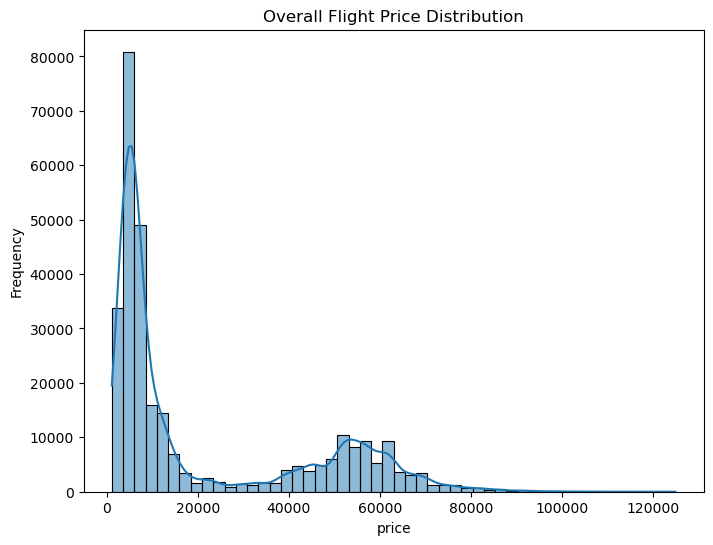

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Overall Flight Price Distribution")
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

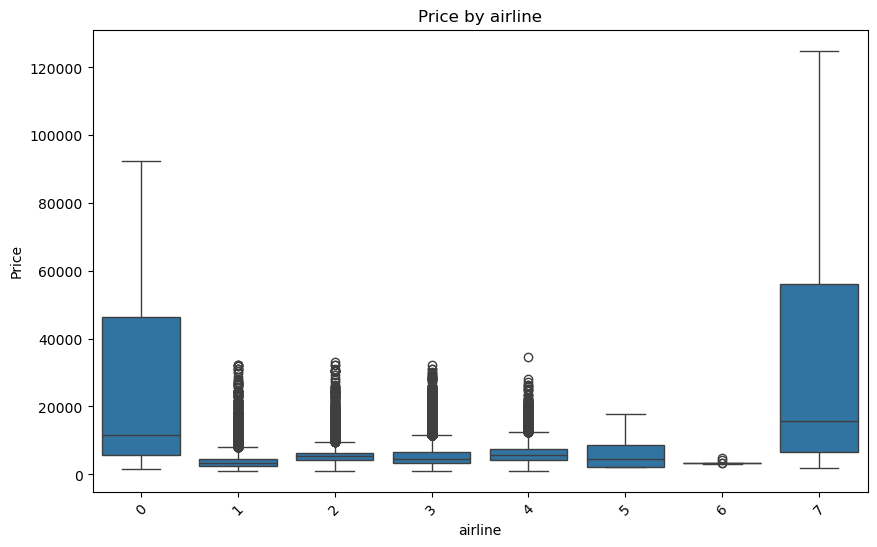

In [21]:
# price distribution by airline
plt.figure(figsize=(10,6))
sns.boxplot(x='airline',y='price',data=df)
plt.title("Price by airline")
plt.xlabel("airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


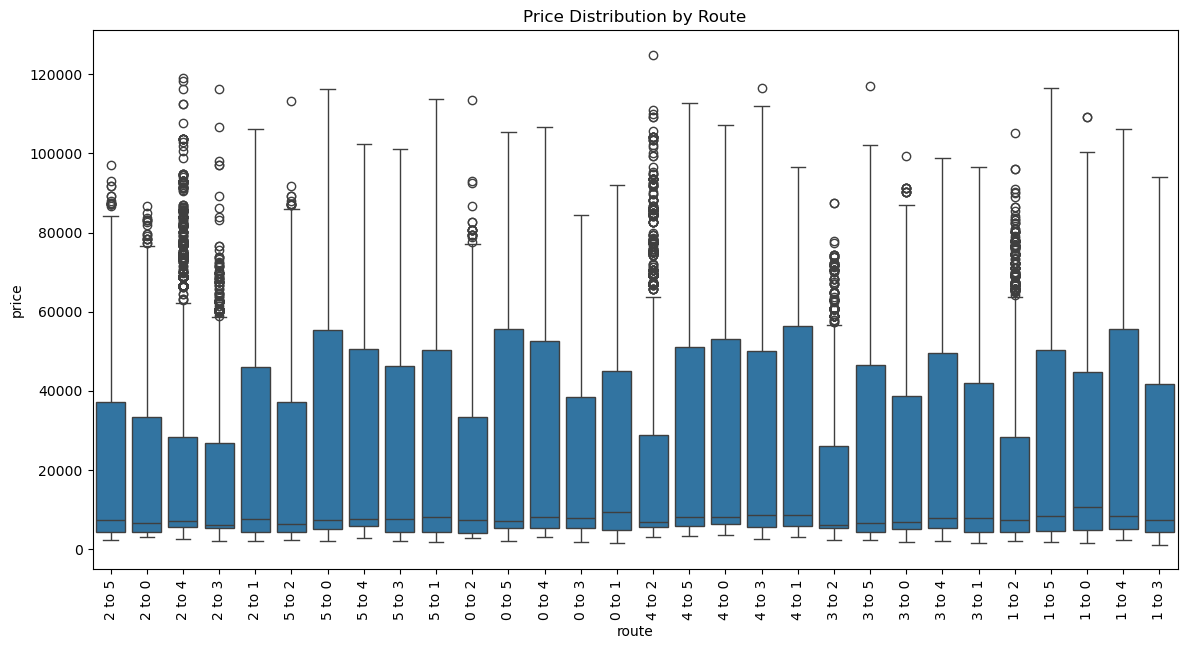

In [22]:
df['route'] = df['from'].astype(str) + " to " + df['to'].astype(str)

plt.figure(figsize=(14,7))
sns.boxplot(x='route', y='price', data=df)
plt.title('Price Distribution by Route')
plt.xticks(rotation=90)
plt.show()


In [23]:
# 1. Scatter Plot – Price vs Duration

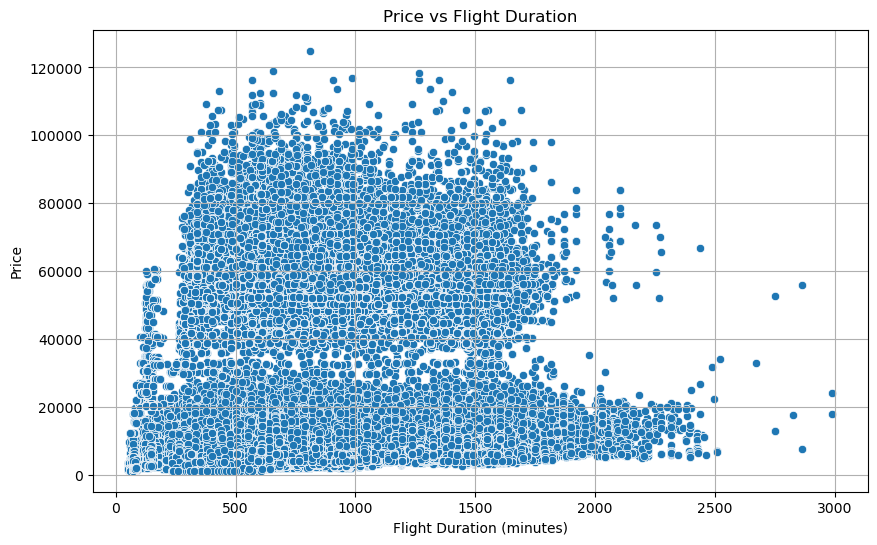

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration_minutes', y='price', data=df)
plt.title('Price vs Flight Duration')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


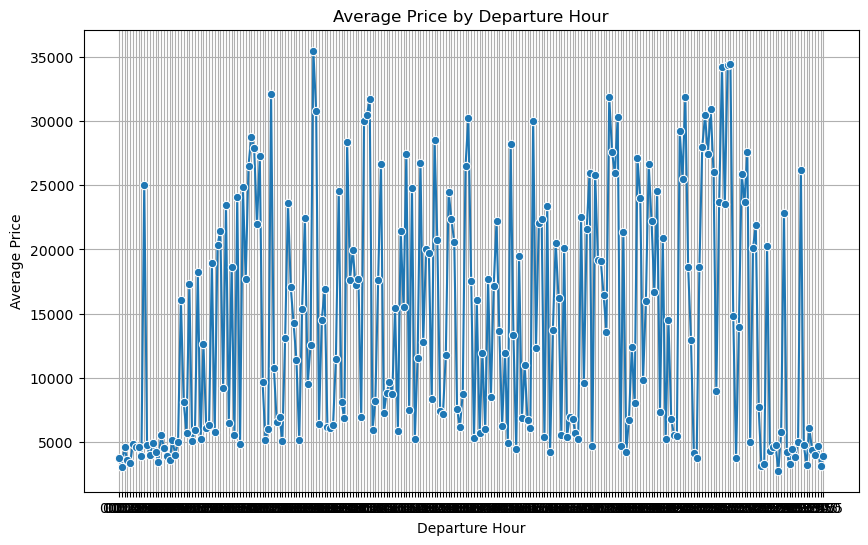

In [25]:
avg_price_by_hour = df.groupby('dep_time')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='dep_time', y='price', data=avg_price_by_hour, marker='o')
plt.title('Average Price by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


In [26]:
 # 1. Box Plot – Price Distribution by Stops

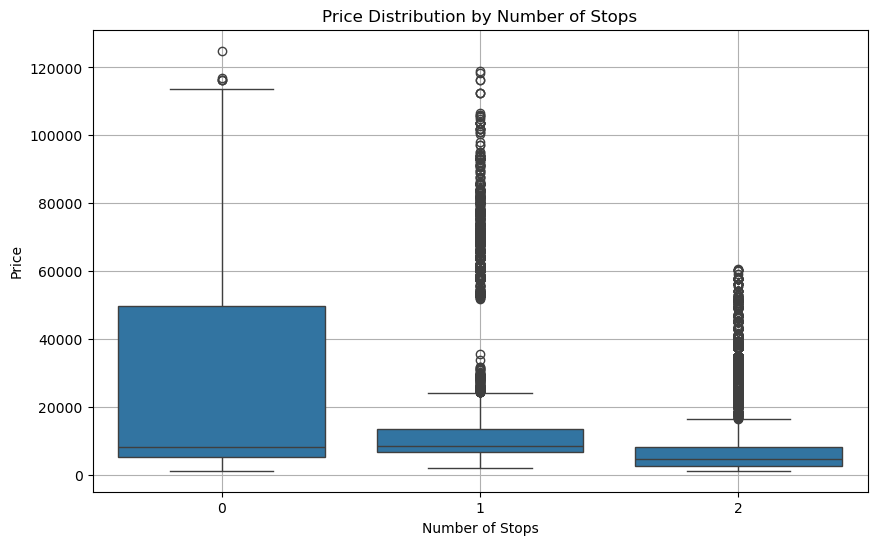

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stops', y='price', data=df)
plt.title('Price Distribution by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.grid(True)
plt.show()


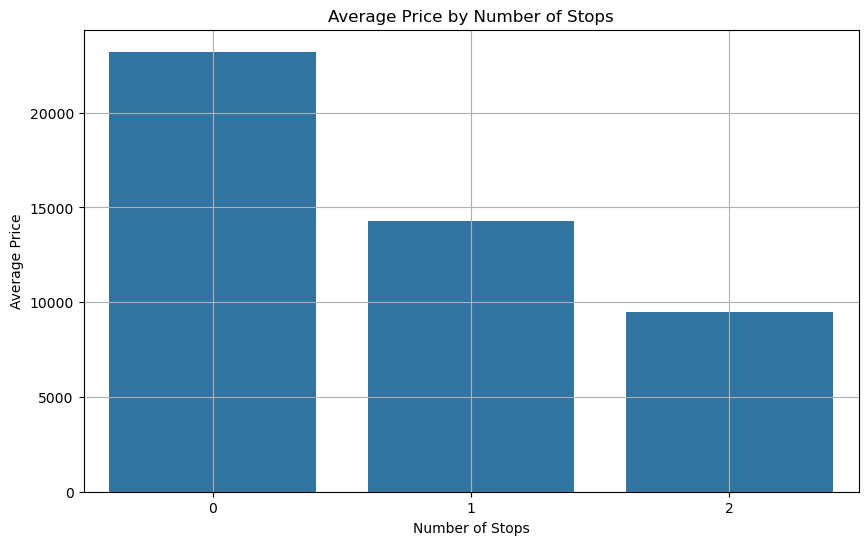

In [28]:
avg_price_by_stops = df.groupby('stops')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='stops', y='price', data=avg_price_by_stops)
plt.title('Average Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


In [29]:
df.head(2)

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,price,stops,duration_minutes,route
0,2023-06-26,4,SG-8709,1,2,18:55,5,21:05,6013,2,130,2 to 5
1,2023-06-26,4,SG-8157,1,2,06:20,5,08:40,6013,2,140,2 to 5


In [30]:
# Model Selection and Training:
# Train-Test Split:

In [31]:
from sklearn.model_selection import train_test_split

df['route']=le.fit_transform(df['route'])

x=df[['airline','class','duration_minutes','from','to','route']]
y=df['price']


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [33]:
# Regression Algorithms:
# linear regression

In [34]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [35]:
# b) Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
# c) Gradient Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [41]:
#model evalution 

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Evaluate Linear Regression
print("Linear Regression Performance:")
evaluate_model(lr, x_test, y_test)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
evaluate_model(rf, x_test, y_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Performance:")
evaluate_model(gb, x_test, y_test)


Linear Regression Performance:
MAE: 4817.80
RMSE: 7518.41

Random Forest Performance:
MAE: 2341.88
RMSE: 3736.49

Gradient Boosting Performance:
MAE: 3685.13
RMSE: 5510.19


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

evaluate_model(best_rf, x_test, y_test)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 2341.59
RMSE: 3735.76


In [46]:
# stamlit 
pip install joblib

SyntaxError: invalid syntax (1162708381.py, line 2)

In [ ]:
import joblib
joblib.dump(lr, 'linear_model.pkl')
